# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv').

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [36]:
import os
import pandas as pd

root_dir = 'C:/Users/Kanchan/OneDrive - University of Leeds/Semester2/Machine Learning/Coursework' # this is to be defined by you 
local_path = '/datasets/COMP5611M_Assessment/' # store the related data files in this folder

data_dir = root_dir + local_path
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

In [37]:
# Importing all the libraries
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

In [38]:
# read train data independent variables
train_x = pd.read_csv(training_data_path)

#read train data dependent variables
train_y = pd.read_csv(training_targets_path)

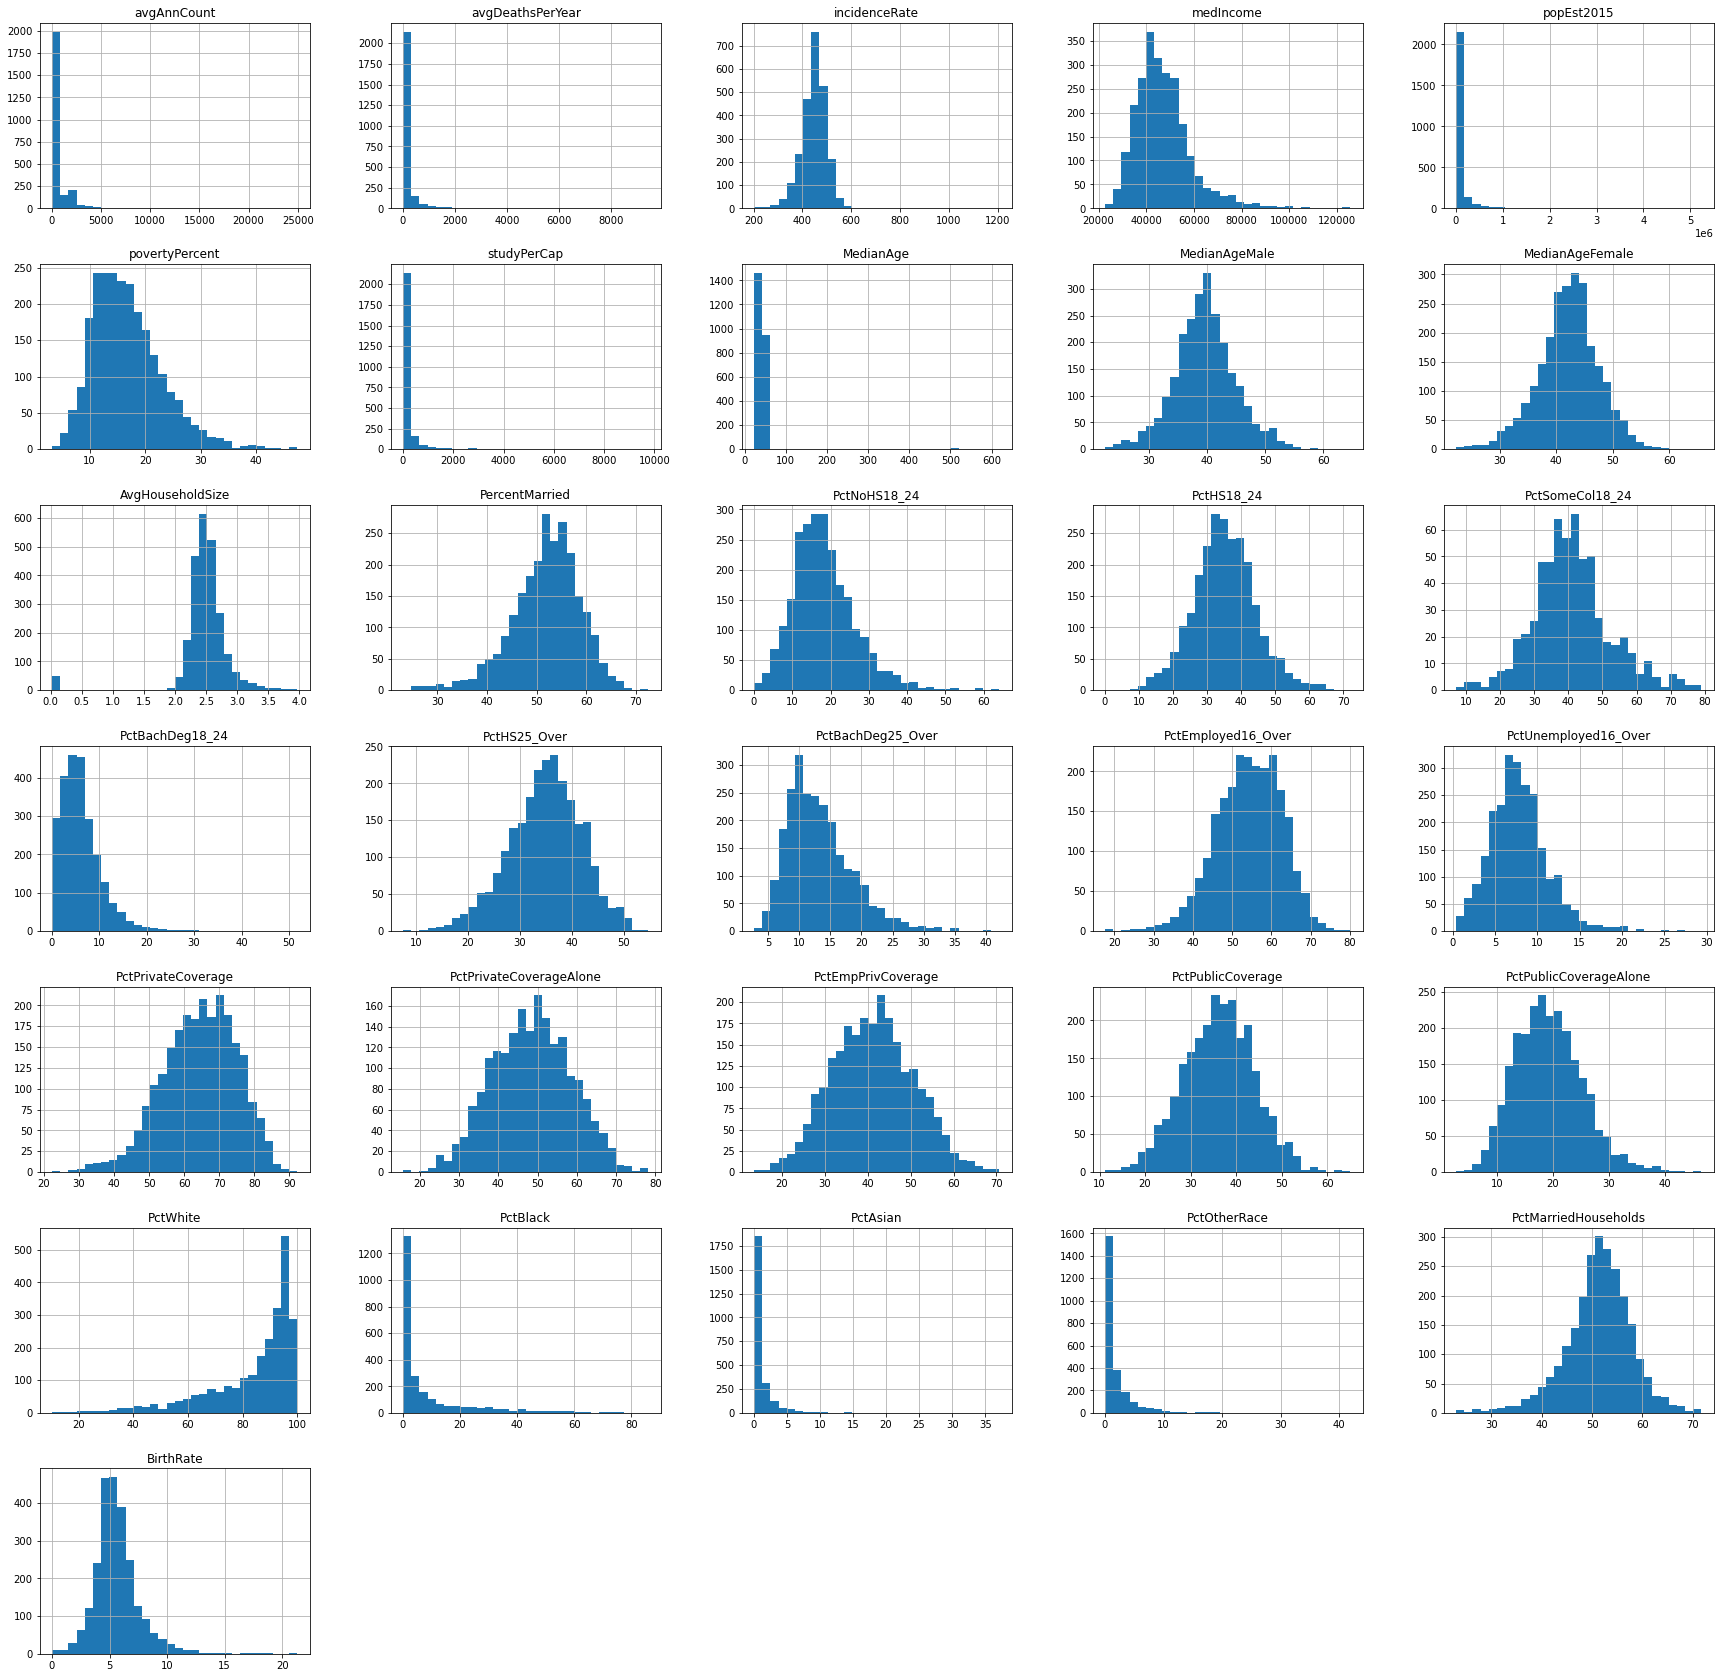

In [39]:
train_x.hist(bins=30,layout= (7,5), figsize=(30, 30));

From the above histograms, it is evident that the variables avgAnnCount, avgDeathsPerYear, popEst2015, studyPerCap, MedianAge ,PctBachDeg18_24, PctWhite,PctBlack,PctAsian,PctOtherRace have highly skewed distribution and require boxplots to verify the outliers. But the remaining variables are good to be checked from the histrogram plots. In median Income variable , there are some values above 1200000 which are very far from the mean and represent clear outliers. The values above 45 in PovertyPercent, near 0 values for the AvgHouseholdSize , the values nearing to 5 in PercentMarried, above 60 for PctNoHS18_24, the data points near to 0 in PctHS25_Over, the ones with above 40 for PctBachDeg_Over, below 20 for Pctemployed16_Over, values with above 25 for PctUnemployed16_Over, below 20 for PctPrivatecoverageAlone, above 45 for PctPublicCoverageAlone, and BirthRate higher than 18 clearly act as outliers as we can see these bins appearing very very far from the peak of the histogram. Having a value of 500 for Median Age is very unusual.

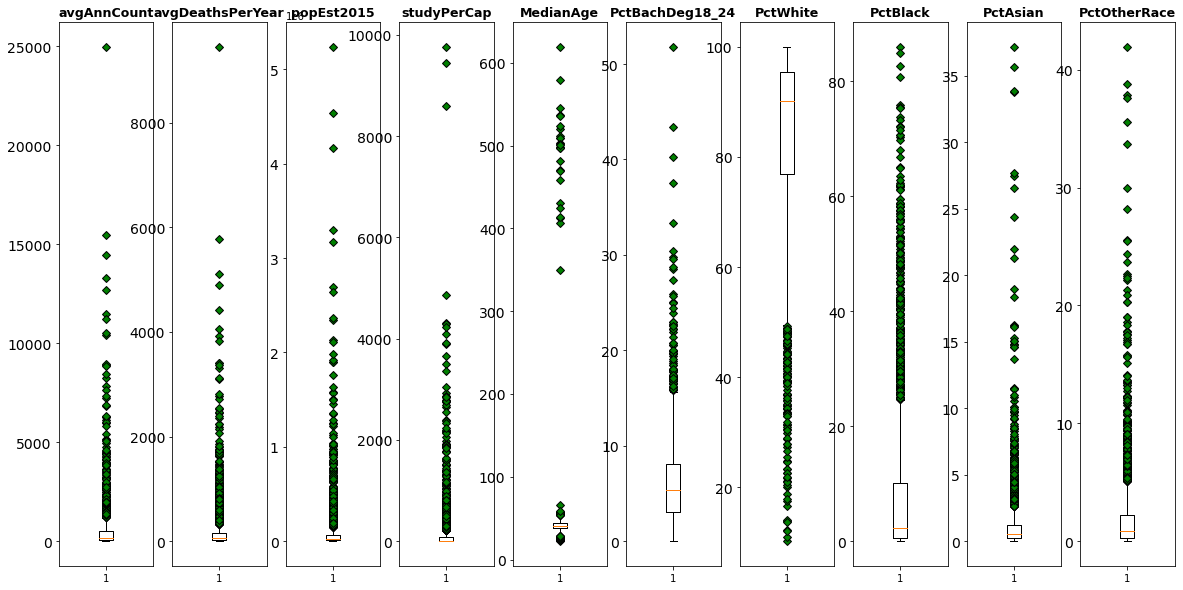

In [94]:
cols = ["avgAnnCount", "avgDeathsPerYear", "popEst2015", "studyPerCap", "MedianAge" ,"PctBachDeg18_24", 
        "PctWhite","PctBlack","PctAsian","PctOtherRace"]
box_df = train_x[cols]
green_diamond = dict(markerfacecolor='green', marker='D')
fig , axs = plt.subplots(1,len(box_df.columns),figsize= (20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(box_df.iloc[:,i],flierprops=green_diamond)
    ax.set_title(box_df.columns[i],fontsize = 12.6,fontweight="bold")
    ax.tick_params(axis="y",labelsize =14)
    #ax.semilogy() # log scale shows beautiful boxplots

For the skewed distributions, boxplots are the best way to visualise outliers.There are so many outliers shown by the green coloured diamond points. The orange coloured line in between the box represents the mean. A value of zero is assigned to 1548 rows out of 2438 records. This value seems a bit off from the other columns.

The correlations of all the features with respect to the target variable are medium and not so strong. Every correlation coefficient is below 0.5. The top 5 features that have highest correlation in comparision to other variables are PctBachDeg25_Over, incidenceRate, PctPublicCoverageAlone, medIncome, povertyPercent , out of which 2 variables i.e, PctBachDeg25_Over, medIncome are negatively correlated with target while the remaining variables are positively correlated. 

In [41]:
corr_frst5 = (train_x.corrwith(train_y.TARGET_deathRate)).sort_values(ascending=False,key=abs)[0:5].to_frame().reset_index()
corr_frst5.rename(columns={corr_frst5.columns[0]: 'Variables',corr_frst5.columns[1]: 'Correlation'},inplace=True)
corr_frst5

,Variables,Correlation
0,PctBachDeg25_Over,-0.491411
1,incidenceRate,0.443983
2,PctPublicCoverageAlone,0.439734
3,medIncome,-0.416607
4,povertyPercent,0.413260


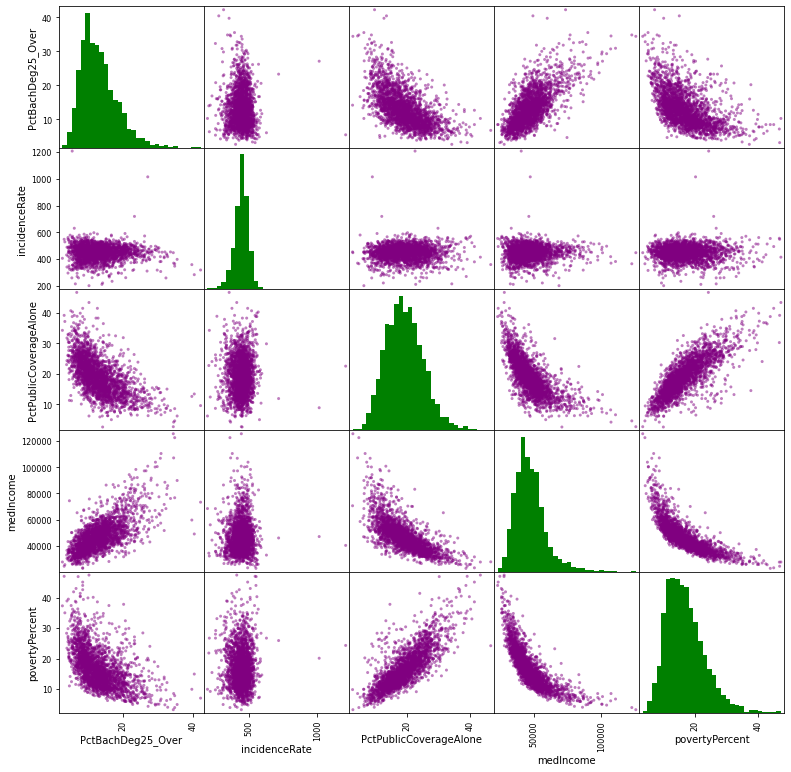

In [42]:
corr_frst5_var = corr_frst5["Variables"].tolist()
corr_frst5_var
top_corr5 = train_x[corr_frst5_var]
pd.plotting.scatter_matrix(top_corr5,color = "purple",figsize=(13,13),hist_kwds={'bins':30, 'color':'green'});

PctPulblicCoverageAlone showed a strong positive correlation with povertyPercent from the (3,5) dimension of matrix. Also PCtBachDeg25_Over has a strong positive correlation with medIncome which is obvious because, those who studied the highest education can earn more as they can possibly land in a good job.Looking closely into these plots.

Text(0, 0.5, 'medIncome')

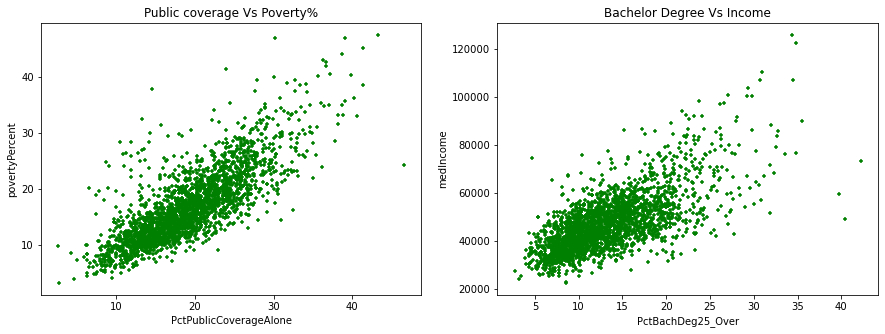

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(train_x['PctPublicCoverageAlone'],train_x['povertyPercent'],color="green",s=10,marker="+")
plt.title("Public coverage Vs Poverty%")
plt.xlabel("PctPublicCoverageAlone")
plt.ylabel("povertyPercent")

plt.subplot(1, 2, 2)
plt.scatter(train_x['PctBachDeg25_Over'],train_x['medIncome'],color="green",s=10,marker="+")
plt.title("Bachelor Degree Vs Income")
plt.xlabel("PctBachDeg25_Over")
plt.ylabel("medIncome")

The first plot on the left represents quite strong correlation between PctPublicCoverageAlone and povertyPercent. The variance of the varible PctPublicCoverageAlone is high compared to the povertyPercent as evident from the plot. The one on the right also shows a good correlation between PctBachDeg25_Over and medIncome. The variance of the y-variable i.e, median Income is somewhat comparable to the x-variable(PctBachDeg25_Over). And the overall variance along the two variables in the right-hand side plot is a bit high compared to the one on left-hand side.

# **Exercise 2**

Create an ML pipeline using scikit-learn to pre-process the training data. 

The data we have in the training_data is all numerical. So first we will check which columns have the missing data and act accordingly. Using the below code, we can say that the three columns that have missing data are PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone.

In [44]:
train_x.columns[train_x.isna().any()].tolist() # these columns have NaN values

['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']

In [45]:
print("The number of rows with missing values in variable 'PctSomeCol18_24' is ",len(train_x[train_x["PctSomeCol18_24"].isna()]))
print("The number of rows with missing values in variable 'PctEmployed16_Over' is ",len(train_x[train_x["PctEmployed16_Over"].isna()]))
print("The number of rows with missing values in variable 'PctPrivateCoverageAlone' is ",len(train_x[train_x["PctPrivateCoverageAlone"].isna()]))

The number of rows with missing values in variable 'PctSomeCol18_24' is  1829
The number of rows with missing values in variable 'PctEmployed16_Over' is  119
The number of rows with missing values in variable 'PctPrivateCoverageAlone' is  483


since 75% of the data is missing for the feature PctSomeCol18_24, it is better we discard the variable. so removing this varaible from the training data set we perform the remaining analysis. A custom transfomer is used to remove the column.

In [46]:
dropping_col = train_x.drop('PctSomeCol18_24', axis=1)
attribs = list(dropping_col)

class columnDropperTransformer(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [47]:
pipeline = Pipeline([
    ("columnDropper", columnDropperTransformer(attribs)),
    ("imputing",SimpleImputer(strategy="median")),
    ("Standardisation",StandardScaler())   
])

cancerData_train_x = pipeline.fit_transform(train_x)

After the pipeline is executed, the column **PctSomeCol18_24** is dropped and all the data that is missing is replaced with the median of the respective variable. The data is then standardised i.e, subtracting mean from data points ad dividing by the standard deviation. When the pipeline is fitted and transformed, the resultant is 2D array.

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. 


### Linear regression using OLS

Linear regression can be expressed of the form :\
$y = a1*x1 + a2*x2 + a3*x3 + ...$ \
The x1, x2, x3 ... are the feature variables to which the model is fitted. The coefficients a1,a2,a3... are the weights to the variables whose sum product obtain the death rate.

Loss function for the ordinary least square(OLS) method is .\
$ OLS = (Predicted value - Actual value)^2 $ \
The weights are chosen in such a way that this loss function is reduced.

We first split the data at 70-30% for training and test data respectively. This is because, the final test data we have is much less to decide on the model. so, we split the data using train_test_split.

In [48]:
CancerData_trainx_df = pd.DataFrame(cancerData_train_x,columns=dropping_col.columns)
# making the test data split
X_train, X_test, y_train, y_test = train_test_split(cancerData_train_x, train_y.values, test_size=0.3, random_state=42)

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

The coefficients obtained for the OLS fit are 

In [50]:
lin_reg.coef_

array([[-4.88473012,  9.32090867, 10.49622036,  1.63826048, -5.12518474,
         2.23460334,  0.41449958, -0.14889424, -2.57883355, -0.62995445,
        -0.10021335,  8.3425799 , -1.39467672,  2.20544334, -0.28985628,
         2.12111363, -8.1494898 , -3.38069536, -0.56170477, -6.44541397,
         0.63178285,  3.47730295, -1.65858967,  2.00010867, -3.10213784,
        -2.1194287 , -0.05638457, -3.5663927 , -8.28566213, -2.80246895]])

Now, looking at the metrics of Root mean squared error, Mean absolute error and R2 score of the linear OLS fit model for the training and test data respectively inorder to check for overfitting.

In [51]:
# Evaluation metrics for training data
y_pred = lin_reg.predict(X_train)
MSE_lin_reg = mean_squared_error(y_train,y_pred)
RMSE_lin_reg = np.round(np.sqrt(MSE_lin_reg),6)
R2_lin_reg = np.round(r2_score(y_train, y_pred),6)
MAE_lin_reg = np.round(mean_absolute_error(y_train, y_pred),6)

print("RMSE for linear regression using OLS (training data) is :", RMSE_lin_reg)
print("R2 Score for linear regression using OLS (training data) is :", R2_lin_reg )
print("MAE for linear regression using OLS (training data) is :", MAE_lin_reg )

RMSE for linear regression using OLS (training data) is : 18.977536
R2 Score for linear regression using OLS (training data) is : 0.526799
MAE for linear regression using OLS (training data) is : 14.04341


In [52]:
# Evaluation metrics for test data
y_pred = lin_reg.predict(X_test)
MSE_lin_reg = mean_squared_error(y_test,y_pred)
RMSE_lin_reg = np.round(np.sqrt(MSE_lin_reg),6)
R2_lin_reg = np.round(r2_score(y_test, y_pred),6)
MAE_lin_reg = np.round(mean_absolute_error(y_test, y_pred),6)

print("RMSE for linear regression using OLS is :", RMSE_lin_reg)
print("R2 Score for linear regression using OLS is :", R2_lin_reg )
print("MAE for linear regression using OLS is :", MAE_lin_reg )

RMSE for linear regression using OLS is : 18.927197
R2 Score for linear regression using OLS is : 0.522081
MAE for linear regression using OLS is : 13.98164


The OLS model shows R2 score of 0.52208 which means, 52.208% of the variability of the dependent variable death rate can be explained by the model while the remaining 47.2 % of the variability is still unaccounted for. Root mean squared error and mean absolute error for the model are 18.92719 and 13.981 respectively.

### Ridge Regression
Linear regression weights are associated with the penalty on the coefficients. It is also known as L2 regularisation\
Loss function = OLS + alpha * summation (squared coefficient values)

Initially consider the regression weight alpha to be a value of 0.01 and check the mean squared error. Then this parameter alpha can be hypertuned such that the best value can be determined by the less value of mean squared error.

In [53]:
Ridge_reg = Ridge(alpha = 0.01)
Ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [54]:
y_pred = Ridge_reg.predict(X_test)
MSE_Ridge_reg = mean_squared_error(y_test,y_pred)
RMSE_Ridge_reg = np.round(np.sqrt(MSE_Ridge_reg),6)
R2_Ridge_reg = np.round(r2_score(y_test, y_pred),6)
MAE_Ridge_reg = np.round(mean_absolute_error(y_test, y_pred),6)

print("RMSE for Ridge regression at alpha of 0.01 is :", RMSE_Ridge_reg)
print("R2 Score for Ridge regression at alpha of 0.01 is :", R2_Ridge_reg )
print("MAE for Ridge regression at alpha of 0.01 is is :", MAE_Ridge_reg )

RMSE for Ridge regression at alpha of 0.01 is : 18.927175
R2 Score for Ridge regression at alpha of 0.01 is : 0.522082
MAE for Ridge regression at alpha of 0.01 is is : 13.981632


The above are the values for the Ridge regression performed at alpha of 0.01. Now, we hypertune the parameter of alpha by performing Gridsearch Cross validation by running the alpha values from 0 to 1 by the step of 0.01 .

In [55]:
Ridge_reg = Ridge()
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
grid = dict()
grid['alpha'] = np.arange(0,1,0.001)
grid_search = GridSearchCV(Ridge_reg,grid,cv=cv,scoring='neg_mean_squared_error')
results = grid_search.fit(X_train,y_train)
alpha_ridge = results.best_params_.get("alpha")

In [56]:
print('The best alpha value is %s' % alpha_ridge)
print('MSE of Ridge regression model with best alpha : %.3f' % -results.best_score_)

The best alpha value is 0.999
MSE of Ridge regression model with best alpha : 383.067


Upon hypertuning, the best alpha value is turned out to be 0.999 with the best mean squared error value of 383.067. Now, the Ridge regression model is trained with the tuned alpha value. The coefficients of the Ridge regression are shown below.

In [57]:
Ridge_reg = Ridge(alpha = alpha_ridge)
Ridge_reg.fit(X_train,y_train)
y_pred = Ridge_reg.predict(X_test)
MSE_Ridge_reg = mean_squared_error(y_test,y_pred)
RMSE_Ridge_reg = np.round(np.sqrt(MSE_Ridge_reg),6)
R2_Ridge_reg = np.round(r2_score(y_test, y_pred),6)
Ridge_reg.coef_

array([[-4.82571399,  9.10098237, 10.49321929,  1.60339069, -4.96132886,
         2.21264977,  0.41415087, -0.15091986, -2.55092483, -0.64269398,
        -0.10549721,  8.23028395, -1.38873766,  2.21133315, -0.28778103,
         2.13098482, -8.12359427, -3.34430833, -0.54979767, -6.40697278,
         0.62276565,  3.45228623, -1.63871264,  2.01047097, -3.08211088,
        -2.10107856, -0.05518918, -3.56297889, -8.19851695, -2.79737142]])

Now, looking at the metrics of Root mean squared error, Mean absolute error and R2 score of the Ridge Regression model for the training and test data respectively inorder to check for overfitting.

In [58]:
# Evaluation metrics for training data
y_pred = Ridge_reg.predict(X_train)
MSE_Ridge_reg = mean_squared_error(y_train,y_pred)
RMSE_Ridge_reg = np.round(np.sqrt(MSE_Ridge_reg),6)
R2_Ridge_reg = np.round(r2_score(y_train, y_pred),6)
MAE_Ridge_reg = np.round(mean_absolute_error(y_train, y_pred),6)

print("RMSE for Ridge regression at best alpha of 0.999 (training data) is :", RMSE_Ridge_reg)
print("R2 Score for Ridge regression at best alpha of 0.999 (training data) is :", R2_Ridge_reg )
print("MAE for Ridge regression at best alpha of 0.999 (training data) is :", MAE_Ridge_reg )

RMSE for Ridge regression at best alpha of 0.999 (training data) is : 18.977625
R2 Score for Ridge regression at best alpha of 0.999 (training data) is : 0.526794
MAE for Ridge regression at best alpha of 0.999 (training data) is : 14.043297


In [59]:
# Evaluation metrics for test data
y_pred = Ridge_reg.predict(X_test)
MSE_Ridge_reg = mean_squared_error(y_test,y_pred)
RMSE_Ridge_reg = np.round(np.sqrt(MSE_Ridge_reg),6)
R2_Ridge_reg = np.round(r2_score(y_test, y_pred),6)
MAE_Ridge_reg = np.round(mean_absolute_error(y_test, y_pred),6)

print("RMSE for Ridge regression at best alpha of 0.999 is :", RMSE_Ridge_reg)
print("R2 Score for Ridge regression at best alpha of 0.999 is :", R2_Ridge_reg )
print("MAE for Ridge regression at best alpha of 0.999 is :", MAE_Ridge_reg )

RMSE for Ridge regression at best alpha of 0.999 is : 18.925136
R2 Score for Ridge regression at best alpha of 0.999 is : 0.522185
MAE for Ridge regression at best alpha of 0.999 is : 13.980945


### Lasso regression

Linear regression weights are associated with the penalty on the coefficients. It is also known L1 regularisation\
Loss function = OLS + alpha * summation (coefficient values)

In [60]:
from sklearn.linear_model import Lasso
Lasso_reg = Lasso(alpha = 0.1)
Lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [61]:
y_pred = Lasso_reg.predict(X_test)
MSE_Lasso_reg = mean_squared_error(y_test,y_pred)
RMSE_Lasso_reg = np.round(np.sqrt(MSE_Lasso_reg),6)
R2_Lasso_reg = np.round(r2_score(y_test, y_pred),6)
MAE_Lasso_reg = np.round(mean_absolute_error(y_test, y_pred),6)

print("RMSE for Lasso regression at alpha of 0.1 is :", RMSE_Lasso_reg)
print("R2 Score for Lasso regression at alpha of 0.1 is :", R2_Lasso_reg )
print("MAE for Lasso regression at alpha of 0.1 is :", MAE_Lasso_reg )

RMSE for Lasso regression at alpha of 0.1 is : 18.906501
R2 Score for Lasso regression at alpha of 0.1 is : 0.523126
MAE for Lasso regression at alpha of 0.1 is : 14.001786


Hypertuning the parameter alpha for lasso regression by running alpha values from 0.01 to 1 with the step 0.01

In [62]:
Lasso_reg = Lasso()
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
grid = dict()
grid['alpha'] = np.arange(0.01,1,0.01)
grid_search = GridSearchCV(Lasso_reg,grid,cv=cv,scoring='neg_mean_squared_error')
results = grid_search.fit(X_train,y_train)
alpha_lasso = np.round(results.best_params_.get("alpha"),5)

In [63]:
print('The best alpha value is %s' % alpha_lasso)
print('MSE of Lasso regression model with best alpha : %.3f' % -results.best_score_)

The best alpha value is 0.07
MSE of Lasso regression model with best alpha : 382.123


After hyper tuning parameter alpha for ridge and lasso regression, the best aplha for Ridge and Lasso are 0.999 and 0.07 respectively. Now, building lasso regression model for the best alpha value. The coefficients are as shown below.

In [64]:
Lasso_reg = Lasso(alpha = alpha_lasso)
Lasso_reg.fit(X_train,y_train)
y_pred = Lasso_reg.predict(X_test)
MSE_Lasso_reg = mean_squared_error(y_test,y_pred)
RMSE_Lasso_reg = np.round(np.sqrt(MSE_Lasso_reg),6)
R2_Lasso_reg = np.round(r2_score(y_test, y_pred),6)
Lasso_reg.coef_

array([-3.93611412e+00,  5.45191566e+00,  1.05273033e+01,  6.60239796e-01,
       -2.13496558e+00,  1.46977055e+00,  2.98987254e-01, -1.48608171e-01,
       -2.30665348e+00, -8.95230043e-01, -4.77399870e-02,  6.19147597e+00,
       -1.20483950e+00,  2.32328824e+00, -6.59352352e-02,  2.09098344e+00,
       -7.75049073e+00, -2.36891995e+00, -1.01219486e-01, -6.44279806e+00,
        3.72823326e-01,  3.37452540e+00, -0.00000000e+00,  7.66700582e-01,
       -2.33641186e+00, -1.35913055e+00,  7.66797516e-03, -3.42030992e+00,
       -6.58919928e+00, -2.62034565e+00])

Now, looking at the metrics of Root mean squared error, Mean absolute error and R2 score of the Lasso Regression model for the training and test data respectively inorder to check for overfitting.

In [65]:
# Evaluation metrics for training data
y_pred = Lasso_reg.predict(X_train)
MSE_Lasso_reg = mean_squared_error(y_train,y_pred)
RMSE_Lasso_reg = np.round(np.sqrt(MSE_Lasso_reg),6)
R2_Lasso_reg = np.round(r2_score(y_train, y_pred),6)
MAE_Lasso_reg = np.round(mean_absolute_error(y_train, y_pred),6)

print("RMSE for Lasso regression at best alpha of 0.7 (training data) is :", RMSE_Lasso_reg)
print("R2 Score for Lasso regression at best alpha of 0.7 (training data) is :", R2_Lasso_reg )
print("MAE for Lasso regression at best alpha of 0.7 (training data) is :", MAE_Lasso_reg )

RMSE for Lasso regression at best alpha of 0.7 (training data) is : 19.015325
R2 Score for Lasso regression at best alpha of 0.7 (training data) is : 0.524912
MAE for Lasso regression at best alpha of 0.7 (training data) is : 14.093606


In [66]:
# Evaluation metrics for test data
y_pred = Lasso_reg.predict(X_test)
MSE_Lasso_reg = mean_squared_error(y_test,y_pred)
RMSE_Lasso_reg = np.round(np.sqrt(MSE_Lasso_reg),6)
R2_Lasso_reg = np.round(r2_score(y_test, y_pred),6)
MAE_Lasso_reg = np.round(mean_absolute_error(y_test, y_pred),6)

print("RMSE for Lasso regression at best alpha of 0.7 is :", RMSE_Lasso_reg)
print("R2 Score for Lasso regression at best alpha of 0.7 is :", R2_Lasso_reg )
print("MAE for Lasso regression at best alpha of 0.7 is :", MAE_Lasso_reg )

RMSE for Lasso regression at best alpha of 0.7 is : 18.901035
R2 Score for Lasso regression at best alpha of 0.7 is : 0.523402
MAE for Lasso regression at best alpha of 0.7 is : 13.98832


In [68]:
print("RMSE for linear regression using OLS is :", RMSE_lin_reg)
print("R2 Score for linear regression using OLS is :", R2_lin_reg )

print("RMSE for Ridge regression at aplha of 0.01 is :", RMSE_Ridge_reg)
print("R2 Score for Ridge regression at best alpha of 0.999 is :", R2_Ridge_reg )

print("RMSE for Lasso regression at aplha of 0.1 is :", RMSE_Lasso_reg)
print("R2 Score for Lasso regression at best alpha of 0.7 is :", R2_Lasso_reg )

RMSE for linear regression using OLS is : 18.927197
R2 Score for linear regression using OLS is : 0.522081
RMSE for Ridge regression at aplha of 0.01 is : 18.925136
R2 Score for Ridge regression at best alpha of 0.999 is : 0.522185
RMSE for Lasso regression at aplha of 0.1 is : 18.901035
R2 Score for Lasso regression at best alpha of 0.7 is : 0.523402


Comparing the RMSE for all the 3 models(OLS,Ridge and Lasso), we can infer that, the error values of OLS fit and Ridge regression are almost very close to each other but the Lasso Regression fit having a bit less RMSE. The R2 Score of lasso is somewhat higher by almost 0.001 units. From the above quantitative values, since RMSe of Lasso is 18.90 and R2 of 52.34% is greater than any other,Lasso regression can be regarded as the best model to predict the death rate.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. 

In [78]:
Lasso_reg = Lasso(alpha = alpha_lasso)
Lasso_reg.fit(X_train,y_train)
attributes = CancerData_trainx_df.columns
Lasso_reg.coef_

array([-3.93611412e+00,  5.45191566e+00,  1.05273033e+01,  6.60239796e-01,
       -2.13496558e+00,  1.46977055e+00,  2.98987254e-01, -1.48608171e-01,
       -2.30665348e+00, -8.95230043e-01, -4.77399870e-02,  6.19147597e+00,
       -1.20483950e+00,  2.32328824e+00, -6.59352352e-02,  2.09098344e+00,
       -7.75049073e+00, -2.36891995e+00, -1.01219486e-01, -6.44279806e+00,
        3.72823326e-01,  3.37452540e+00, -0.00000000e+00,  7.66700582e-01,
       -2.33641186e+00, -1.35913055e+00,  7.66797516e-03, -3.42030992e+00,
       -6.58919928e+00, -2.62034565e+00])

In [79]:
Lasso_top_coeff = pd.DataFrame(zip(attributes),Lasso_reg.coef_).reset_index()
Lasso_top_coeff.rename(columns={Lasso_top_coeff.columns[0]: 'Correlation',Lasso_top_coeff.columns[1]: 'Variables'},inplace=True)
Lasso_top_coeff.sort_values(by="Correlation",ascending=False,key=abs)[0:5]

,Correlation,Variables
2,10.527303,incidenceRate
16,-7.750491,PctBachDeg25_Over
28,-6.589199,PctMarriedHouseholds
19,-6.442798,PctPrivateCoverage
11,6.191476,PercentMarried


The best lasso regression model is with alpha =0.07, the coefficients of the fitted model denote the importance of the model. As the variables can be expressed as a linear combination, the weights associated can represent the contribution of the variable to the output variable.
The top most 5 features that have high contribution towards the output are as following :

**incidenceRate\
PctBachDeg25_Over\
PctMarriedHouseholds\
PctPrivateCoverage\
PercentMarried**

The variables incidenceRate, PercentMarried show positive relationship i.e, vary positively with the output i.e, we find 10.52% increase in death rate for every 1% rise in incidenceRate, 6.19% increase in death rate for every 1% increase in PercentMarried.

But the variables PctBachDeg25_Over, PctMarriedHouseholds and PctPrivateCoverage show an inverse relationship. 1% rise in PctBachDeg25_Over shows a decline of 7.75% of death rate and similarly a decrease in 6.58% death rate is observed for every 1% increase in PctMarriedHouseholds and fall of 6.44% death rate for every 1% rise of PctPrivateCoverage.

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? 

In [80]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,np.ravel(y_train))

RandomForestRegressor()

In [81]:
y_pred = forest_reg.predict(X_train)
MSE_forest_reg = mean_squared_error(y_train,y_pred)
RMSE_forest_reg = np.round(np.sqrt(MSE_forest_reg),6)
R2_forest_reg = np.round(r2_score(y_train, y_pred),6)
MAE_forest_reg = np.round(mean_absolute_error(y_train, y_pred),6)
print("RMSE for Random Forest regressor (training) is :", RMSE_forest_reg)
print("R2 Score for Random Forest regressor (training) is :", R2_forest_reg )
print("MAE for Random Forest regressor (training) is :", MAE_forest_reg )

RMSE for Random Forest regressor (training) is : 6.941751
R2 Score for Random Forest regressor (training) is : 0.936685
MAE for Random Forest regressor (training) is : 5.122451


In [82]:
y_pred = forest_reg.predict(X_test)
MSE_forest_reg = mean_squared_error(y_test,y_pred)
RMSE_forest_reg = np.round(np.sqrt(MSE_forest_reg),6)
R2_forest_reg = np.round(r2_score(y_test, y_pred),6)
MAE_forest_reg = np.round(mean_absolute_error(y_test, y_pred),6)
print("RMSE for Random Forest regressor (test) is :", RMSE_forest_reg)
print("R2 Score for Random Forest regressor (test) is :", R2_forest_reg )
print("MAE for Random Forest regressor (test) is :", MAE_forest_reg )

RMSE for Random Forest regressor (test) is : 19.538201
R2 Score for Random Forest regressor (test) is : 0.490727
MAE for Random Forest regressor (test) is : 14.115025


Random Forest did well for training data but less R2 score compared to the Lasso model. The MSE for Random Forest regressor is also high when compared to Lasso Regression . Thus best linear regressor is the Lasso regressor.So,Lasso can be regarded as the best model. Also R2 score for the random forest regressor is bit less compapred to Lasso model. Now, lets check the important features that are considered best by the random forest regressor. 

Text(0.5, 1.0, 'First 5 important attributes of Lasso Regression in decreasing importance')

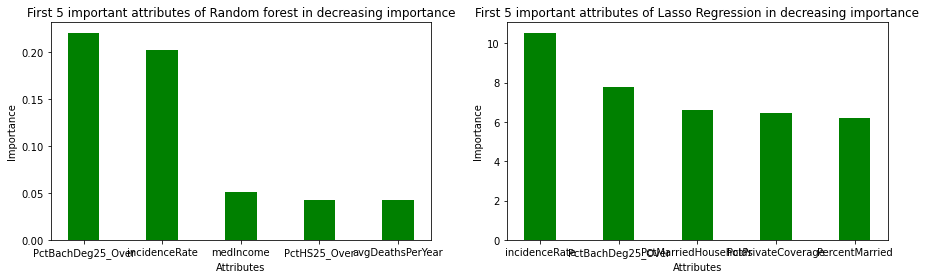

In [83]:
imp_5_var_RF = pd.DataFrame(sorted(zip(forest_reg.feature_importances_,attributes),reverse=True)[0:5],
                            columns = ["Importance","Attribute"])

imp_5_var_LR = pd.DataFrame(sorted(zip(abs(Lasso_reg.coef_),attributes),reverse=True))[0:5]
imp_5_var_LR.columns = ["Importance","Attribute"]
imp_5_var_LR.sort_values("Importance",inplace=True,ascending = False)

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.bar(imp_5_var_RF["Attribute"],imp_5_var_RF["Importance"],color ='green',width = 0.4)
plt.xlabel("Attributes")
plt.ylabel("Importance")
plt.xticks(fontsize=10)
plt.title("First 5 important attributes of Random forest in decreasing importance")

plt.subplot(1, 2, 2)
plt.bar(imp_5_var_LR["Attribute"],imp_5_var_LR["Importance"],color ='green',width = 0.4)
plt.xlabel("Attributes")
plt.ylabel("Importance")
plt.xticks(fontsize=10)
plt.title("First 5 important attributes of Lasso Regression in decreasing importance")

The plot shows the variable importance in the decreasing order.\
The best 5 attributes that are relevant in the Random forest regressor are \
**PctBachDeg25_Over\
incidenceRate\
medIncome\
avgDeathsPerYear\
PctHS25_Over**

whereas the order of varibales for Lasso Regression are :\
**incidenceRate\
PctBachDeg25_Over\
PctMArriedHouseholds\
PrivateCoverage\
PercentMarried**

The variables Incidence Rate, PctBachDeg25_Over seem to occur as relevant features in both the models. IncidenceRate has been given highest importance in Lasso and second best in Random Forest Regressor. 

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. 

In [84]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()

#cancerData_train = pipeline.fit_transform(train_x)
Lasso_reg_final = Lasso(alpha = alpha_lasso)

# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
Lasso_reg_final.fit(cancerData_train_x,train_y)
# Next write the lines of code required to predict on unseen test data and evaluate your predictions
test_x = pd.read_csv(test_data_path)
test_y = pd.read_csv(test_targets_path)
cancerData_test = pipeline.fit_transform(test_x)
y_predictions = Lasso_reg_final.predict(cancerData_test)

In [85]:
#Evaluation Metrics

MSE_Lasso_reg = mean_squared_error(test_y,y_predictions)
RMSE_Lasso_reg = np.round(np.sqrt(MSE_Lasso_reg),6)
R2_Lasso_reg = np.round(r2_score(test_y, y_predictions),6)
MAE_Lasso_reg = np.round(mean_absolute_error(test_y, y_predictions),6)

print("RMSE for Lasso regression at best aplha of 0.7 is :", RMSE_Lasso_reg)
print("R2 Score for Lasso regression at best aplha of 0.7 is :", R2_Lasso_reg )
print("MAE for Lasso regression at best aplha of 0.7 is :", MAE_Lasso_reg )

RMSE for Lasso regression at best aplha of 0.7 is : 22.5358
R2 Score for Lasso regression at best aplha of 0.7 is : 0.328727
MAE for Lasso regression at best aplha of 0.7 is : 16.613291


The best model observed is the lasso regressor for the data. The whole of the training data is now taken and the model is trained and predicted for the unseen test data. When these predictions are compared with the actual unseen dependent variable, the model has a bit higher RMSE and the R2 score lies at 32.87% which means, it explains the 32.87% of variability of death rate. Mean absolue error is 16.61.

Additionally, we can check how the Random forest regressor works for the unseen data.

In [86]:
y_pred = forest_reg.predict(cancerData_test)
MSE_forest_reg = mean_squared_error(test_y,y_pred)
RMSE_forest_reg = np.round(np.sqrt(MSE_forest_reg),6)
R2_forest_reg = np.round(r2_score(test_y, y_pred),6)
MAE_forest_reg = np.round(mean_absolute_error(test_y, y_pred),6)
print("RMSE for Random Forest regressor (test) is :", RMSE_forest_reg)
print("R2 Score for Random Forest regressor (test) is :", R2_forest_reg )
print("MAE for Random Forest regressor (test) is :", MAE_forest_reg )

RMSE for Random Forest regressor (test) is : 20.637458
R2 Score for Random Forest regressor (test) is : 0.437056
MAE for Random Forest regressor (test) is : 14.8509


From the above we can infer that, though the lasso model is best when compared to the metrics of the models, Random forest regressor does a better job in the pedicting the values of the unseen data with about 10% higher accuracy. This is because, lasso is a single model , but the random forest regressor is a ensemble method which is a technique that combines several base decision tree regressor models in order to produce one optimal predictive model.